## Imports

In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import funcs as f

import datetime

## Read merged data

In [526]:
df_merged = pd.read_parquet('./Processed/WHO-COVID19-MERGED.parquet')

df_countries = pd.read_parquet('./Processed/COUNTRIES_DETAILED.parquet')

# Data exploration and Visualization

In [527]:
# set the ploting style

plt.style.use('ggplot') # go back and execute the graph again

## Total deaths as a percentage of the total population (Top 10)

In [528]:
# group df_merged by 'IsoCode' and calculate the max 'CumulativeDeaths'

df_grouped_country = df_merged.groupby('IsoCode')['CumulativeDeaths'].max().sort_values(ascending=False)

In [529]:
# merge the grouped dataframe from the previous step with df_countries and bring the 'Population' column

df_deaths_population = pd.merge(df_grouped_country, df_countries[['Population', 'IsoCode']], left_on='IsoCode', right_on='IsoCode', how='left').set_index('IsoCode', verify_integrity=True)

In [530]:
# calculate the cumulative deaths to population ratio and add it as a new column

df_deaths_population['CumulativeDeathsPopulationRatio'] = df_deaths_population['CumulativeDeaths'] / df_deaths_population['Population']

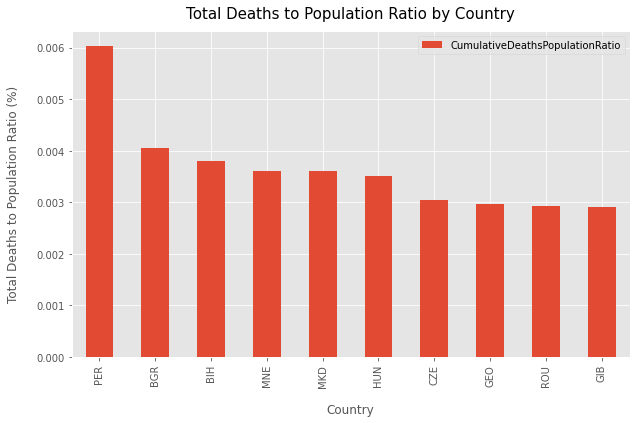

In [531]:
# visualise top 10 countries with the highest cumulative deaths to population ratio

df_deaths_population[['CumulativeDeathsPopulationRatio']].sort_values('CumulativeDeathsPopulationRatio', ascending=False).head(10).plot(kind='bar', figsize=(10,6))
plt.xlabel("Country", labelpad=16)
plt.ylabel("Total Deaths to Population Ratio (%)", labelpad=16)
plt.title("Total Deaths to Population Ratio by Country", y=1.02, fontsize=15);

# Total deaths per country (Top 10)

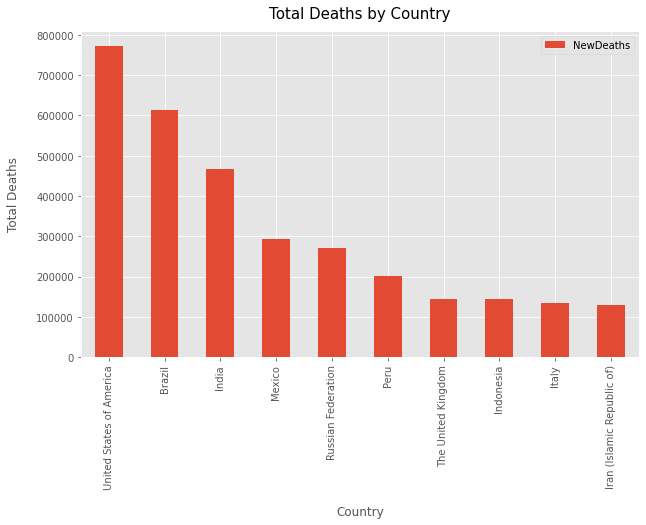

In [532]:
df_merged.groupby('Country').agg({'NewDeaths':'sum'}).sort_values('NewDeaths', ascending=False).head(10).plot(kind='bar', figsize=(10,6))
plt.xlabel("Country", labelpad=16)
plt.ylabel("Total Deaths", labelpad=16)
plt.title("Total Deaths by Country", y=1.02, fontsize=15);

# Total deaths by continent

In [533]:
df_deaths_continent = pd.merge(df_grouped_country, df_countries[['Continent', 'IsoCode']], left_on='IsoCode', right_on='IsoCode', how='left')

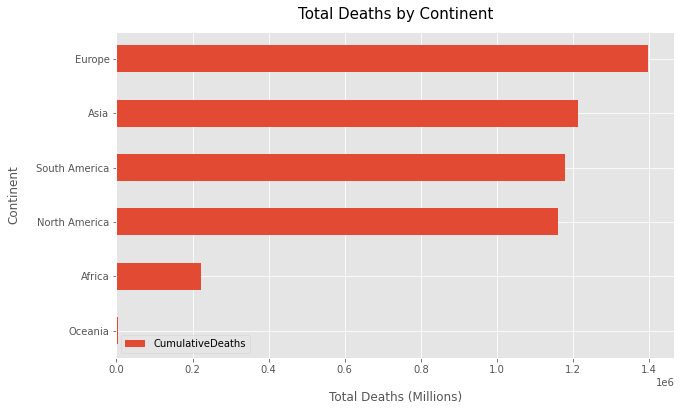

In [534]:
df_deaths_continent.groupby('Continent').agg({'CumulativeDeaths':'sum'}).sort_values(by='CumulativeDeaths', ascending=True).plot(kind='barh',figsize=(10,6))
plt.xlabel("Total Deaths (Millions)", labelpad=16)
plt.ylabel("Continent", labelpad=16)
plt.title("Total Deaths by Continent", y=1.02, fontsize=15);

## New cases to population ratio countries for the past 7 days (Top 10)

In [535]:
# create DataFrame that only contains information about the past 7 days

df_merged_past7 = df_merged.loc[df_merged['DateReported'] >= datetime.datetime.now() - datetime.timedelta(days = 7)]

In [536]:
# create new DataFrame that groups 'df_merged_past7' by 'IsoCode' and get the sum of 'NewCases'

df_grouped_past7 = df_merged_past7.groupby('IsoCode').agg({'NewCases':'sum'})

In [537]:
# join 'df_grouped_past7' to 'df_countries' to get the population of each country

df_newcases_population = pd.merge(df_grouped_past7, df_countries[['Population', 'IsoCode']], left_on='IsoCode', right_on='IsoCode', how='left')

In [538]:
# calculate the ratio of new cases to population and add it as new column calles 'NewCasesPopulationRatio'

df_newcases_population['NewCasesPopulationRatio'] = df_newcases_population['NewCases'] / df_newcases_population['Population']

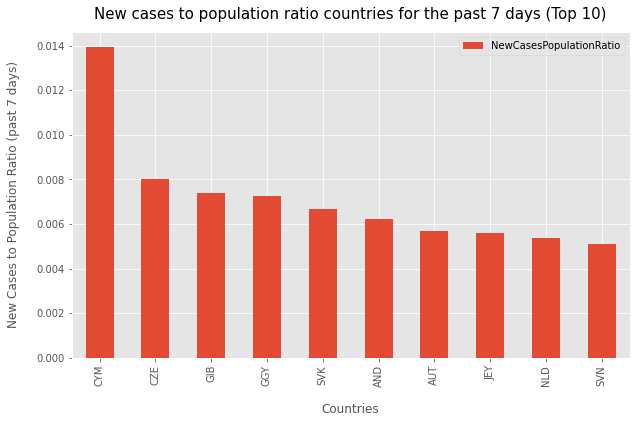

In [539]:
# visualise new cases to population ratio countries for the past 7 days (Top 10)

df_newcases_population.drop(columns=['Population', 'NewCases']).sort_values(by='NewCasesPopulationRatio', ascending=False).set_index('IsoCode').head(10).plot(kind='bar',figsize=(10,6))
plt.xlabel("Countries", labelpad=16)
plt.ylabel("New Cases to Population Ratio (past 7 days)", labelpad=16)
plt.title("New cases to population ratio countries for the past 7 days (Top 10)", y=1.02, fontsize=15);

## Total vaccinations per country (Top 10)

In [540]:
# join the 'df_merged' to 'df_countries' and only take the required columns

df_peopplevaccinated_countries = pd.merge(df_merged[['IsoCode', 'PeopleVaccinated']], df_countries[['Population', 'IsoCode']], left_on='IsoCode', right_on='IsoCode', how='left')

In [541]:
# calculate the vaccinations to population ratio and add it as new column called 'VaccinationPopulationRatio'

df_peopplevaccinated_countries['VaccinationPopulationRatio'] = (df_peopplevaccinated_countries['PeopleVaccinated'] / df_peopplevaccinated_countries['Population']) * 100

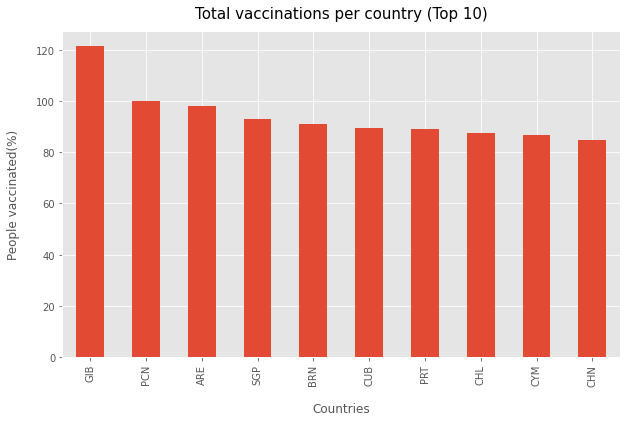

In [542]:
# visualise Total vaccinations per country (Top 10)

# IMPORTANT: Gibraltar's rate of vaccinations to population exceeds 120% due to the doses received by Spaniards who cross the border to work or visit the territory every day. 
# Reference: https://www.riotimesonline.com/brazil-news/modern-day-censorship/in-gibraltar-100-of-adults-are-fully-vaccinated-against-covid-19-and-yet-new-cases-are-exploding/

df_peopplevaccinated_countries.groupby('IsoCode')['VaccinationPopulationRatio'].max().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,6))
plt.xlabel('Countries', labelpad=16)
plt.ylabel('People vaccinated(%)', labelpad=16)
plt.title('Total vaccinations per country (Top 10)', y=1.02, fontsize=15);

## New Daily Confirmed Cases in UK

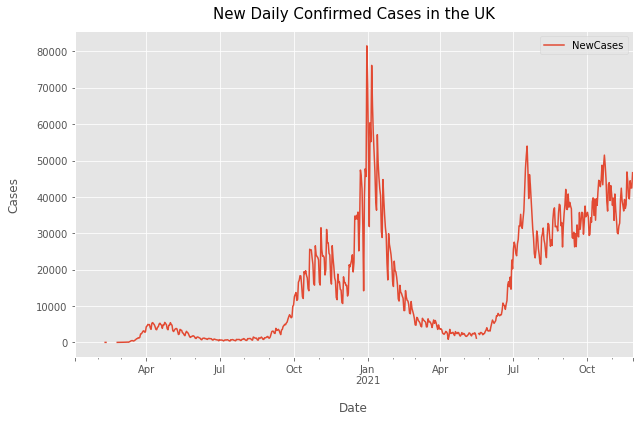

In [632]:
df_merged.loc[df_merged['Country'] == 'The United Kingdom', ['DateReported', 'NewCases']].set_index('DateReported').plot.line(figsize=(10,6))
plt.xlabel('Date', labelpad=16)
plt.ylabel('Cases', labelpad=16)
plt.title('New Daily Confirmed Cases in the UK', y=1.02, fontsize=15);

## New Daily Vaccinations in UK

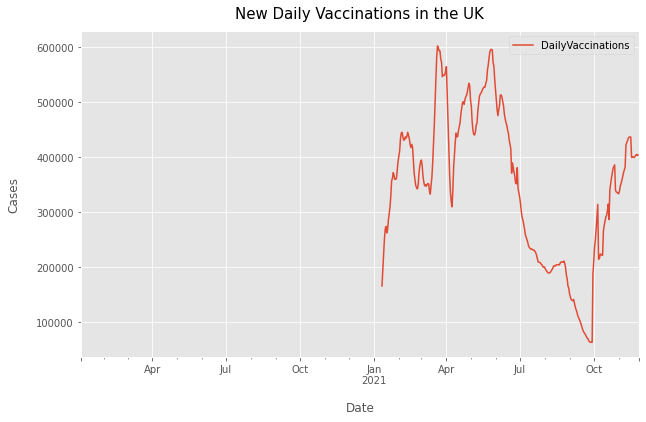

In [631]:
df_merged.loc[df_merged['Country'] == 'The United Kingdom', ['DateReported', 'DailyVaccinations']].set_index('DateReported').plot.line(figsize=(10,6))
plt.xlabel('Date', labelpad=16)
plt.ylabel('Cases', labelpad=16)
plt.title('New Daily Vaccinations in the UK', y=1.02, fontsize=15);

## New Cases vs Daily Vaccinations in the UK

<AxesSubplot:xlabel='DateReported'>

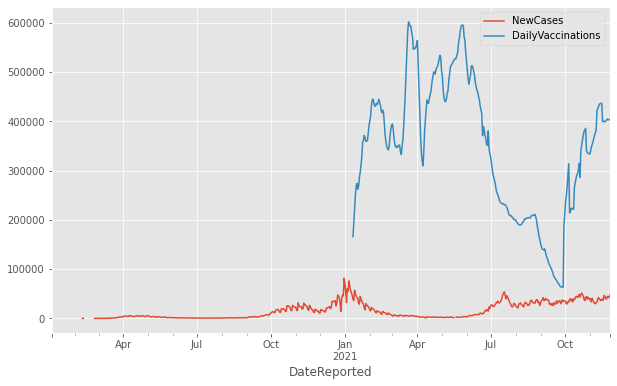

In [641]:
(df_merged.query('Country == "The United Kingdom"')
          .set_index('DateReported')
          [['NewCases', 'DailyVaccinations']]
          .plot.line(figsize=(10,6))
)

## New Cases Compared in the UK, US and Canada

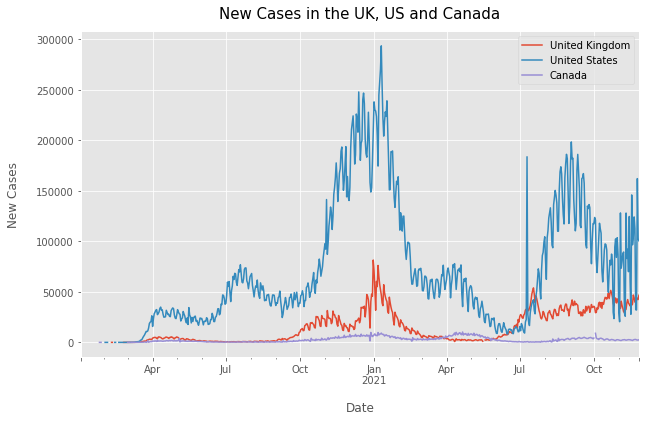

In [642]:
df_uk = df_merged.query('Country == "The United Kingdom"')[['DateReported', 'NewCases']]
df_us = df_merged.query('Country == "United States of America"')[['DateReported', 'NewCases']]
df_canada = df_merged.query('Country == "Canada"')[['DateReported', 'NewCases']]

df_countries = pd.merge(pd.merge(df_uk, df_us, left_on='DateReported', right_on='DateReported', how='left'), df_canada, left_on='DateReported', right_on='DateReported', how='left').set_index('DateReported')

df_countries.plot.line(figsize=(10,6))
plt.xlabel('Date', labelpad=16)
plt.ylabel('New Cases', labelpad=16)
plt.title('New Cases in the UK, US and Canada', y=1.02, fontsize=15)
plt.legend(['United Kingdom', 'United States', 'Canada']);